# Recency_Frequency_and_Monetary_analysis

In [157]:
import pandas as pd
df = pd.read_csv("retail.csv")
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,"6,95",13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,"2,1",13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,"1,25",13085.0,United Kingdom


# EDA

In [158]:
df.shape

(1048575, 8)

In [159]:
df.describe() # There are around 811893 customers only out of 1048575

,Quantity,Customer ID
count,1.048575e+06,811893.000000
mean,9.957525e+00,15324.712265
std,1.335187e+02,1697.033034
min,-7.421500e+04,12346.000000
25%,1.000000e+00,13971.000000
50%,3.000000e+00,15260.000000
75%,1.000000e+01,16795.000000
max,7.421500e+04,18287.000000


In [160]:
df.describe(include = 'object')

,Invoice,StockCode,Description,InvoiceDate,Price,Country
count,1048575,1048575,1044203,1048575,1048575,1048575
unique,52961,5304,5697,47046,2784,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.12.2010 16:57,"1,25",United Kingdom
freq,1350,5781,5875,1350,102704,963819


In [161]:
for columns in df.columns:
    if df[columns].dtype == "object":
        print(columns.upper())
        print("*"*45)
        print("The Number of Unique Columns are: ", df[columns].nunique())
        print("*"*45)
        print(df[columns].value_counts)
        print("*"*45)



INVOICE
*********************************************
The Number of Unique Columns are:  52961
*********************************************
<bound method IndexOpsMixin.value_counts of 0          489434
1          489434
2          489434
3          489434
4          489434
            ...  
1048570    580501
1048571    580501
1048572    580502
1048573    580502
1048574    580502
Name: Invoice, Length: 1048575, dtype: object>
*********************************************
STOCKCODE
*********************************************
The Number of Unique Columns are:  5304
*********************************************
<bound method IndexOpsMixin.value_counts of 0           85048
1          79323P
2          79323W
3           22041
4           21232
            ...  
1048570     23284
1048571     22507
1048572     22469
1048573     23489
1048574     23046
Name: StockCode, Length: 1048575, dtype: object>
*********************************************
DESCRIPTION
*********************************

In [162]:
df.corr() # No much output can be observed

,Quantity,Customer ID
Quantity,1.000000,-0.007432
Customer ID,-0.007432,1.000000


<AxesSubplot:>

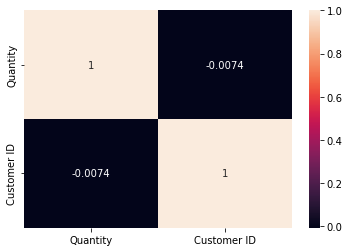

In [163]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True)

In [164]:
df['Price'] = df["Price"].str.replace(",",'.') # replacing the "," in price column to "."

In [165]:
df['Price'] = pd.to_numeric(df['Price']) # converting the price column from object to numeric
df['Price']

0          6.95
1          6.75
2          6.75
3          2.10
4          1.25
           ... 
1048570    8.25
1048571    4.95
1048572    1.65
1048573    2.89
1048574    6.65
Name: Price, Length: 1048575, dtype: float64

In [166]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) # changing the InvoiceDate column from object to datetime

In [167]:
df['Customer ID'] = pd.to_numeric(df['Customer ID']) # changing the "Customer ID" column to numeric

In [168]:
df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom


In [169]:
df.info() # confirming if all the changes have occurred or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1048575 non-null  object        
 1   StockCode    1048575 non-null  object        
 2   Description  1044203 non-null  object        
 3   Quantity     1048575 non-null  int64         
 4   InvoiceDate  1048575 non-null  datetime64[ns]
 5   Price        1048575 non-null  float64       
 6   Customer ID  811893 non-null   float64       
 7   Country      1048575 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 64.0+ MB


In [170]:
df['Rev'] = df['Quantity'] * df['Price']
df['Rev'] = round(df['Rev'],2)

# making a new column showing Revenue (alias Rev) by multiplying the Quantity and Price

In [171]:
df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Rev
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1048575 non-null  object        
 1   StockCode    1048575 non-null  object        
 2   Description  1044203 non-null  object        
 3   Quantity     1048575 non-null  int64         
 4   InvoiceDate  1048575 non-null  datetime64[ns]
 5   Price        1048575 non-null  float64       
 6   Customer ID  811893 non-null   float64       
 7   Country      1048575 non-null  object        
 8   Rev          1048575 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 72.0+ MB


In [173]:
df.isnull().sum() # avoiding it, as the changes(removal of null values) were not told to be done

# df = df.dropna(subset = 'Customer ID')
# just in case if it was to be done

Invoice             0
StockCode           0
Description      4372
Quantity            0
InvoiceDate         0
Price               0
Customer ID    236682
Country             0
Rev                 0
dtype: int64

In [174]:
df.duplicated().sum() # 34150 Duplicates are there but not removing as it was not asked to be done

# df = df.drop_duplicates(subset = ['Invoice'])
# just in case if it was to be done

34150

The first thing you need to do is to create an RFM view for each customer. What is RFM view?

You will need to compute the following for each customer:

1. The number of times a customer has made transactions. If in a single day a customer has made 3 transactions, count them as 3 separate transactions. This is the frequency in RFM

2. The total and average revenue per customer. To arrive at revenue, you will need to multiply the Quantity and Price columns. You will also need to clean the Price column for any data quality issues. This will become the monetary term in RFM

3. Lastly you will need to find the recency of the last purchase. This can be computed by finding the number of days that have elapsed from the last purchase each customer has made. You can use a base date of 01/01/2012 to compute recency. Find out the number of days elapsed from 01/01/2012 for each customer's most recent purchase.

At the end of this exercise, you should have a table that looks as given below

# Task 1

**1. The number of times a customer has made transactions. If in a single day a customer has made 3 transactions, count them as 3 separate transactions. This is the frequency in RFM.**


### 1.1 finding the frequency of Revenue Generated based on Customer ID


In [175]:
b = df.groupby('Customer ID')['Rev'].count()
b.head(2)

Customer ID
12346.0     48
12347.0    242
Name: Rev, dtype: int64

In [176]:
# Converting the series into DataFrame
df_Freq = pd.DataFrame(b)
df_Freq.head(2)

,Rev
Customer ID,
12346.0,48
12347.0,242


In [177]:
# Renaming the column name into Frequency and reseting index for the DataFrame
df_Freq = df_Freq.rename(columns = {'Rev':'Freq'}).reset_index()
df_Freq.head(2)

,Customer ID,Freq
0,12346.0,48
1,12347.0,242


### 1.2 Adding the Duration Column to find out the difference with the date 01-01-2012

In [178]:
# Segregating the customer ID and finding the maximum InvoiceDate and replacing it with the difference  using lambda function
x = df.groupby('Customer ID')['InvoiceDate'].max().apply(lambda x: (pd.Timestamp('2012-01-01') - x))
x.head(2)

Customer ID
12346.0   347 days 13:43:00
12347.0    61 days 11:35:00
Name: InvoiceDate, dtype: timedelta64[ns]

In [179]:
# Converting it into a DataFrame
df_Duration = pd.DataFrame(x)
df_Duration.head(2)

,InvoiceDate
Customer ID,
12346.0,347 days 13:43:00
12347.0,61 days 11:35:00


In [180]:
# Renaming the column name and reseting the index
df_Duration = df_Duration.rename(columns = {'InvoiceDate':'Duration'}).reset_index()
df_Duration.head(3)

,Customer ID,Duration
0,12346.0,347 days 13:43:00
1,12347.0,61 days 11:35:00
2,12348.0,97 days 10:47:00


### 1.3 Finding the Average Revenue based on the Customer ID to understand how much each customer has generated revenue on an average


In [181]:
c = df.groupby('Customer ID')['Rev'].mean()
c.head(2)

Customer ID
12346.0    -1.347500
12347.0    22.349174
Name: Rev, dtype: float64

In [182]:
# Converting this Series into a Data Frame
df_Avg_Rev = pd.DataFrame(c)
df_Avg_Rev.head(2)

,Rev
Customer ID,
12346.0,-1.347500
12347.0,22.349174


In [183]:
# Renaming the Column Name to Avg_Rev
df_Avg_Rev = df_Avg_Rev.rename(columns={'Rev':'Avg_Rev'}).reset_index()
df_Avg_Rev.head(2)

,Customer ID,Avg_Rev
0,12346.0,-1.347500
1,12347.0,22.349174


### 1.4 finding the total revenue generated by the customer


In [184]:
a = df.groupby('Customer ID')['Rev'].sum()
a.head(2)

Customer ID
12346.0     -64.68
12347.0    5408.50
Name: Rev, dtype: float64

In [185]:
# Converting it into a DataFrame
df_Total_Rev = pd.DataFrame(a)
df_Total_Rev.head(2)

,Rev
Customer ID,
12346.0,-64.68
12347.0,5408.50


In [186]:
# Renaming the column with Total_Revenue 
df_Total_Rev = df_Total_Rev.rename(columns = {'Rev':'Total_Rev'}).reset_index()
df_Total_Rev.head(3)

,Customer ID,Total_Rev
0,12346.0,-64.68
1,12347.0,5408.50
2,12348.0,2019.40


### 1.5 Merging all the dataframes (Duration, Frequency, Total_revenue, Average_Revenu)

In [187]:
# merging all the columns 
df_RFM_Customer = pd.merge(pd.merge(pd.merge(df_Duration, df_Freq, on = 'Customer ID'),df_Total_Rev, on = 'Customer ID'), df_Avg_Rev, on = 'Customer ID') 
df_RFM_Customer.head(3)

,Customer ID,Duration,Freq,Total_Rev,Avg_Rev
0,12346.0,347 days 13:43:00,48,-64.68,-1.347500
1,12347.0,61 days 11:35:00,242,5408.50,22.349174
2,12348.0,97 days 10:47:00,51,2019.40,39.596078


In [188]:
# selecting all rows in the reverse order
df_RFM_Customer = df_RFM_Customer.iloc[::-1,:].reset_index().drop(['index'],axis = 1)
df_RFM_Customer.head(3)

,Customer ID,Duration,Freq,Total_Rev,Avg_Rev
0,18287.0,21 days 13:37:00,156,4177.89,26.781346
1,18286.0,498 days 12:03:00,70,1188.43,16.977571
2,18285.0,682 days 13:36:00,12,427.00,35.583333


# Task 2

**Once you have the RFM table, you will need to analyze this table further.**

**One of the things you can analyze is to find the vintage of customers. You can find out for which ranges of recency, is the company realizing around 75% of the total revenue.**

In [189]:
df_RFM_Customer.shape

(5924, 5)

In [190]:
df_RFM_Customer.head(2)

,Customer ID,Duration,Freq,Total_Rev,Avg_Rev
0,18287.0,21 days 13:37:00,156,4177.89,26.781346
1,18286.0,498 days 12:03:00,70,1188.43,16.977571


In [191]:
# using qcut to divide the Duration into 10 quantiles
df_RFM_Customer['Recency_Deciles'] = pd.qcut(df_RFM_Customer['Duration'], q =10)
df_RFM_Customer.head(2)

,Customer ID,Duration,Freq,Total_Rev,Avg_Rev,Recency_Deciles
0,18287.0,21 days 13:37:00,156,4177.89,26.781346,"(21 days 06:40:59.999999999, 32 days 12:04:36]"
1,18286.0,498 days 12:03:00,70,1188.43,16.977571,"(436 days 12:19:24, 557 days 12:04:00]"


In [192]:
# adding up all the Revenue generated in that Recency Decile Duration
df_RFM_Analyze = df_RFM_Customer.groupby('Recency_Deciles')['Total_Rev'].sum()
df_RFM_Analyze

Recency_Deciles
(21 days 06:40:59.999999999, 32 days 12:04:36]              5711857.73
(32 days 12:04:36, 43 days 13:59:12]                        2968252.92
(43 days 13:59:12, 61 days 10:34:24.000000001]              2275605.87
(61 days 10:34:24.000000001, 87 days 18:32:36.000000017]    1533952.93
(87 days 18:32:36.000000017, 135 days 08:26:00]             1262303.34
(135 days 08:26:00, 216 days 09:30:36.000000004]             965468.29
(216 days 09:30:36.000000004, 345 days 09:39:30]             586407.40
(345 days 09:39:30, 436 days 12:19:24]                       536943.36
(436 days 12:19:24, 557 days 12:04:00]                       398391.84
(557 days 12:04:00, 1083 days 14:05:00]                      164913.60
Name: Total_Rev, dtype: float64

In [193]:
# Converting it into a DataFrame and reseting index
df_RFM_Analyze = pd.DataFrame(df_RFM_Analyze).reset_index()
df_RFM_Analyze

,Recency_Deciles,Total_Rev
0,"(21 days 06:40:59.999999999, 32 days 12:04:36]",5711857.73
1,"(32 days 12:04:36, 43 days 13:59:12]",2968252.92
2,"(43 days 13:59:12, 61 days 10:34:24.000000001]",2275605.87
3,"(61 days 10:34:24.000000001, 87 days 18:32:36....",1533952.93
4,"(87 days 18:32:36.000000017, 135 days 08:26:00]",1262303.34
5,"(135 days 08:26:00, 216 days 09:30:36.000000004]",965468.29
6,"(216 days 09:30:36.000000004, 345 days 09:39:30]",586407.40
7,"(345 days 09:39:30, 436 days 12:19:24]",536943.36
8,"(436 days 12:19:24, 557 days 12:04:00]",398391.84
9,"(557 days 12:04:00, 1083 days 14:05:00]",164913.60


In [194]:
# adding a column named as cumsum_Rev for cumulative revenue generated out of total Revenue based on that Recency_Deciles
df_RFM_Analyze['CumSum_Rev'] = df_RFM_Analyze['Total_Rev'].cumsum()

In [195]:
# adding a new column giving the max of Total Revenue which will help us in making percentage of total revenue
df_RFM_Analyze['Total_Rev_Across_Deciles'] = df_RFM_Analyze['CumSum_Rev'].max()

In [196]:
# adding a new column which will give the percent of total revenue generated by that percentile of Duration
df_RFM_Analyze['Perc_tot_rev'] = (df_RFM_Analyze['CumSum_Rev']/df_RFM_Analyze['Total_Rev_Across_Deciles'])

In [197]:
df_RFM_Analyze

,Recency_Deciles,Total_Rev,CumSum_Rev,Total_Rev_Across_Deciles,Perc_tot_rev
0,"(21 days 06:40:59.999999999, 32 days 12:04:36]",5711857.73,5711857.73,16404097.28,0.348197
1,"(32 days 12:04:36, 43 days 13:59:12]",2968252.92,8680110.65,16404097.28,0.529143
2,"(43 days 13:59:12, 61 days 10:34:24.000000001]",2275605.87,10955716.52,16404097.28,0.667865
3,"(61 days 10:34:24.000000001, 87 days 18:32:36....",1533952.93,12489669.45,16404097.28,0.761375
4,"(87 days 18:32:36.000000017, 135 days 08:26:00]",1262303.34,13751972.79,16404097.28,0.838325
5,"(135 days 08:26:00, 216 days 09:30:36.000000004]",965468.29,14717441.08,16404097.28,0.897181
6,"(216 days 09:30:36.000000004, 345 days 09:39:30]",586407.40,15303848.48,16404097.28,0.932928
7,"(345 days 09:39:30, 436 days 12:19:24]",536943.36,15840791.84,16404097.28,0.965661
8,"(436 days 12:19:24, 557 days 12:04:00]",398391.84,16239183.68,16404097.28,0.989947
9,"(557 days 12:04:00, 1083 days 14:05:00]",164913.60,16404097.28,16404097.28,1.000000


# Task 3

**Lastly you will need to find the recency of the last purchase. This can be computed by finding the number of days that have elapsed from the last purchase each customer has made. You can use a base date of 01/01/2012 to compute recency. Find out the number of days elapsed from 01/01/2012 for each customer's most recent purchase.**

In [198]:
df_RFM_Customer.head(2)

,Customer ID,Duration,Freq,Total_Rev,Avg_Rev,Recency_Deciles
0,18287.0,21 days 13:37:00,156,4177.89,26.781346,"(21 days 06:40:59.999999999, 32 days 12:04:36]"
1,18286.0,498 days 12:03:00,70,1188.43,16.977571,"(436 days 12:19:24, 557 days 12:04:00]"


In [199]:
# Creating a column for getting frequency Decile and making 10 quantiles
df_RFM_Customer['Freq_Deciles'] = pd.qcut(df_RFM_Customer['Freq'], q = 10)
df_RFM_Customer['Freq_Deciles'].head(2)

0    (114.0, 180.0]
1      (53.0, 76.0]
Name: Freq_Deciles, dtype: category
Categories (10, interval[float64, right]): [(0.999, 8.0] < (8.0, 16.0] < (16.0, 25.0] < (25.0, 37.0] ... (76.0, 114.0] < (114.0, 180.0] < (180.0, 319.7] < (319.7, 12780.0]]

In [200]:
df_RFM_Customer.head(2)

,Customer ID,Duration,Freq,Total_Rev,Avg_Rev,Recency_Deciles,Freq_Deciles
0,18287.0,21 days 13:37:00,156,4177.89,26.781346,"(21 days 06:40:59.999999999, 32 days 12:04:36]","(114.0, 180.0]"
1,18286.0,498 days 12:03:00,70,1188.43,16.977571,"(436 days 12:19:24, 557 days 12:04:00]","(53.0, 76.0]"


In [201]:
# developing a new data with 10 quantiles of Frequency Deciles and summing up all the Revenue(total_Revenue)
df_subset = df_RFM_Customer.groupby('Freq_Deciles')['Total_Rev'].sum()
df_subset.head(2)

Freq_Deciles
(0.999, 8.0]     72193.16
(8.0, 16.0]     242098.13
Name: Total_Rev, dtype: float64

In [202]:
# Creating a DataFrame out of the new data
df_subset = pd.DataFrame(df_subset)
df_subset.head(2)

,Total_Rev
Freq_Deciles,
"(0.999, 8.0]",72193.16
"(8.0, 16.0]",242098.13


In [203]:
#  Reseting data set to take the frequency decile column out of index
df_subset = df_subset.reset_index()
df_subset.head(2)

,Freq_Deciles,Total_Rev
0,"(0.999, 8.0]",72193.16
1,"(8.0, 16.0]",242098.13


In [204]:
# adding a fresh column named as cumsum for getting the cumulative summation of total revenue generated in that perticular decile
df_subset['CumSum']= df_subset['Total_Rev'].cumsum()
df_subset.head(2)

,Freq_Deciles,Total_Rev,CumSum
0,"(0.999, 8.0]",72193.16,72193.16
1,"(8.0, 16.0]",242098.13,314291.29


In [205]:
# adding a fresh column named as Total which will be helpfull for taking out the percentage of that perticular decile
df_subset['Total'] = df_subset['CumSum'].max()
df_subset.head(2)

,Freq_Deciles,Total_Rev,CumSum,Total
0,"(0.999, 8.0]",72193.16,72193.16,16404097.28
1,"(8.0, 16.0]",242098.13,314291.29,16404097.28


In [206]:
# finding the percentage total
df_subset['Perc_Total'] = df_subset['CumSum']/df_subset['Total']

In [207]:
df_subset

,Freq_Deciles,Total_Rev,CumSum,Total,Perc_Total
0,"(0.999, 8.0]",72193.16,72193.16,16404097.28,0.004401
1,"(8.0, 16.0]",242098.13,314291.29,16404097.28,0.019159
2,"(16.0, 25.0]",274574.73,588866.02,16404097.28,0.035897
3,"(25.0, 37.0]",383583.74,972449.76,16404097.28,0.059281
4,"(37.0, 53.0]",603851.61,1576301.37,16404097.28,0.096092
5,"(53.0, 76.0]",773353.64,2349655.01,16404097.28,0.143236
6,"(76.0, 114.0]",1070299.19,3419954.20,16404097.28,0.208482
7,"(114.0, 180.0]",1630626.02,5050580.22,16404097.28,0.307885
8,"(180.0, 319.7]",2761936.17,7812516.39,16404097.28,0.476254
9,"(319.7, 12780.0]",8591580.89,16404097.28,16404097.28,1.000000
